## 一、算法审查

### 对于当前数据集，寻找最优算法

### 没有最好的分类器，只有最合适的分类器。
### 随机森林平均来说最强，但也只在9.9%的数据集上拿到了第一，优点是鲜有短板。
### SVM的平均水平紧随其后，在10.7%的数据集上拿到第一。
### 神经网络（13.2%）和boosting（~9%）表现不错。
### 数据维度越高，随机森林就比AdaBoost强越多，但是整体不及SVM[2]。### 数据量越大，神经网络就越强。

### 作者：xyzh
### 链接：https://www.zhihu.com/question/26726794/answer/151282052
### 来源：知乎
### 著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

## 二、线性算法

### 1.逻辑回归

### &ensp;&ensp;&ensp;&ensp;1.1 原理 ：函数找到最合适的参数，使得函数的值和样本的值最接近。

### &ensp;&ensp;&ensp;&ensp;1.2 适用场景：虽然效果一般，却胜在模型清晰，背后的概率学经得住推敲

### 2.线性判别分析（LDA）

### &ensp;&ensp;&ensp;&ensp;2.1 原理 ：高维的样本投射(project)到低维上，LDA投射的标准就是让同类的样本尽量靠近，而不同类的尽量分开。

### &ensp;&ensp;&ensp;&ensp;2.2 适用场景：判别分析适用于高维数据需要降维的情况，自带降维功能使得我们能方便地观察样本分布。（假定样本正态分布）

## 三、非线性算法

### 1.K近邻（KNN）

### &ensp;&ensp;&ensp;&ensp;1.1 原理 ：对于待判断的点，找到离它最近的几个数据点，根据它们的类型决定待判断点的类型。

### &ensp;&ensp;&ensp;&ensp;1.2 适用场景：需要一个特别容易解释的模型的时候，比如需要向用户解释原因的推荐算法。

### 2.贝叶斯分类器

### &ensp;&ensp;&ensp;&ensp;2.1 原理 ：核心思路是根据条件概率计算待判断点的类型。

### &ensp;&ensp;&ensp;&ensp;2.2 适用场景：需要一个比较容易解释，而且不同维度之间相关性较小的模型的时候。

### 3.分类与回归树（CART）

### &ensp;&ensp;&ensp;&ensp;3.1 原理 ：给定输入随机变量X条件下，输出随机变量Y的条件概率分布的学习方法

### 4.支持向量机（SVM）

### &ensp;&ensp;&ensp;&ensp;4.1 原理 ：找到不同类别之间的分界面，使得两类样本尽量落在面的两边，而且离分界面尽量远。

### &ensp;&ensp;&ensp;&ensp;4.2 适用场景：普遍适用

### 5.随机森林

### &ensp;&ensp;&ensp;&ensp;5.1 原理 ：它首先随机选取不同的特征和训练样本，生成大量的决策树，然后综合这些决策树的结果来进行最终的分类。

### &ensp;&ensp;&ensp;&ensp;5.2 适用场景：数据维度相对低（几十维），同时对准确性有较高要求时。

### 6.神经网络

### &ensp;&ensp;&ensp;&ensp;6.1 原理 ：利用训练样本(training sample)来逐渐地完善参数。

### &ensp;&ensp;&ensp;&ensp;6.2 适用场景：数据量庞大，参数之间存在内在联系的时候。

## 四、测试

KNN: 0.933 (0.084)
LDA: 0.967 (0.061)
SVM: 0.953 (0.052)
NB: 0.947 (0.058)
CART: 0.933 (0.084)
RF: 0.947 (0.072)
LR: 0.880 (0.148)


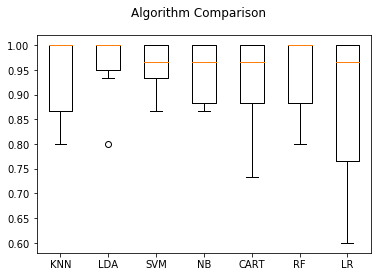

In [28]:
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder



# 导入数据
iris =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
iris.columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'] 

# 将数据分为输入数据和输出结果
arrary = iris.values
# print(arrary)
X =arrary[:,0:4]

le = LabelEncoder()
le.fit(iris['Species'])   
Y = le.transform(iris['Species']) # 对花的类别进行编号处理

num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
models = {}

# 逻辑回归
models['LR'] = LogisticRegression()
# 线性判别分析
models['LDA'] = LinearDiscriminantAnalysis()
# K近邻
models['KNN'] = KNeighborsClassifier()
# 分类与回归树
models['CART'] = DecisionTreeClassifier()
# 支持向量机
models['SVM'] = SVC()
# 随机森林
models['RF'] = RandomForestClassifier(10)
# 朴素贝叶斯分类器
models['NB'] = GaussianNB()

results = []
for name in models:
    result = cross_val_score(models[name], X, Y, cv=kfold)
    results.append(result)
    msg = '%s: %.3f (%.3f)' % (name, result.mean(), result.std())
    print(msg)

# 图表显示
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()


## 五、测试

### git ：https://coding.net/u/RuoYun/p/Python-of-machine-learning/git/tree/master


### 参考：https://read.douban.com/column/6939417/